In [13]:
import labeled_functions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve, precision_score, precision_recall_fscore_support,log_loss, confusion_matrix

In [2]:
X_train_vector , y_train, X_test_vector , y_test = labeled_functions.split_and_vectorize()

Labeled Data loaded.
Data Vectorized


0.001 	 0.75 	 [0.76068376 0.73786408] 	 [0.76724138 0.73076923]
0.1 	 0.75 	 [0.7592068  0.73941368] 	 [0.77011494 0.7275641 ]
0.3 	 0.753030303030303 	 [0.76056338 0.7442623 ] 	 [0.77586207 0.7275641 ]
0.5 	 0.7515151515151515 	 [0.75842697 0.74342105] 	 [0.77586207 0.72435897]
0.75 	 0.7515151515151515 	 [0.75988701 0.74183007] 	 [0.77298851 0.7275641 ]
1 	 0.753030303030303 	 [0.76203966 0.74267101] 	 [0.77298851 0.73076923]
2 	 0.7484848484848485 	 [0.76       0.73548387] 	 [0.76436782 0.73076923]
5 	 0.7363636363636363 	 [0.74033149 0.73154362] 	 [0.77011494 0.69871795]
10 	 0.7136363636363636 	 [0.70866142 0.72043011] 	 [0.77586207 0.64423077]


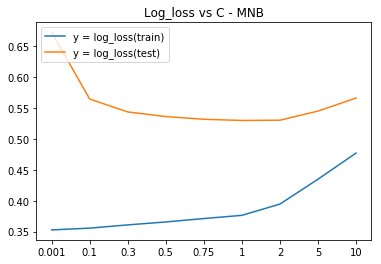

In [20]:
val = []
for alpha in [0.001, 0.1,0.3,0.5,0.75,1,2,5,10]:
    mnb = MultinomialNB(alpha=alpha, )
    mnb.fit(X_train_vector, y_train)
    preds_binary = mnb.predict(X_test_vector)
    preds_prob_train = mnb.predict_proba(X_train_vector)
    preds_prob = mnb.predict_proba(X_test_vector)
    val.append((alpha, log_loss(y_train, preds_prob_train), log_loss(y_test, preds_prob)))
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds_binary)
    score = mnb.score(X_test_vector, y_test)
    print(alpha,"\t", score,"\t", precision,"\t", recall)

x = [str(val[x][0]) for x in range(len(val))]
plt.plot(x, [val[x][1] for x in range(len(val))])
plt.plot(x, [val[x][2] for x in range(len(val))])
plt.legend(['y = log_loss(train)', 'y = log_loss(test)'], loc='upper left')
plt.title("Log_loss vs C - MNB")
plt.show()

In [18]:
precision_score(y_test, preds_binary) # Uniform Distr.

0.742671009771987

In [19]:
precision_recall_fscore_support(y_test, preds_binary)

(array([0.76203966, 0.74267101]),
 array([0.77298851, 0.73076923]),
 array([0.76747504, 0.73667205]),
 array([348, 312]))

In [25]:
confusion_matrix(y_test, preds_binary)

array([[269,  79],
       [ 84, 228]])

In [ ]:
# l1 and l2 regularization, l1 is what we use
# history of models in keras to plot different epochs
# keras.initializer.glorot_uniform(seed=None) USE THIS FOR UNIFORM SEEDS
# balanced accuracy (for precision)